In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('C:\\Users\\ljens\\OneDrive\\Documents\\Spartan Pulse\\gun violence special issue\\Book1.xlsx')

In [10]:
df.head()


,Comments
0,There are like 30 cops in one spot
1,"unconfirmed, just seeing this in a cse groupme..."
2,"again, unconfirmed… just putting this out there"
3,how often are there shootings on campus? Just ...
4,"do not listen to the scanners, its really bad"


In [12]:
df.isna().sum()

Comments    79
dtype: int64

In [14]:
df[df['Comments'].isna()==False]

,Comments
0,There are like 30 cops in one spot
1,"unconfirmed, just seeing this in a cse groupme..."
2,"again, unconfirmed… just putting this out there"
3,how often are there shootings on campus? Just ...
4,"do not listen to the scanners, its really bad"
...,...
419,Books? Puzzles? Pen and paper?
420,nope
421,i was working when the shootings started
422,oof


In [15]:
main = df.copy()

In [16]:
df = df[df['Comments'].isna()==False]

In [17]:
df

,Comments
0,There are like 30 cops in one spot
1,"unconfirmed, just seeing this in a cse groupme..."
2,"again, unconfirmed… just putting this out there"
3,how often are there shootings on campus? Just ...
4,"do not listen to the scanners, its really bad"
...,...
419,Books? Puzzles? Pen and paper?
420,nope
421,i was working when the shootings started
422,oof


In [27]:
len(df)


345

In [53]:
text = " ".join(df['Comments'].astype("str"))

In [169]:
text = text.replace('WTF','fuck')

In [173]:
for f in ['Casualty','fatalities']:
    text = text.replace(f,'dead')

In [80]:
from wordcloud import STOPWORDS
import random
import numpy as np
from os import path
from PIL import Image

In [166]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 100)

In [163]:
mask = np.array(Image.open("C:\\Users\\ljens\\OneDrive\\Documents\\Spartan Pulse\\fcopy4.jpg"))

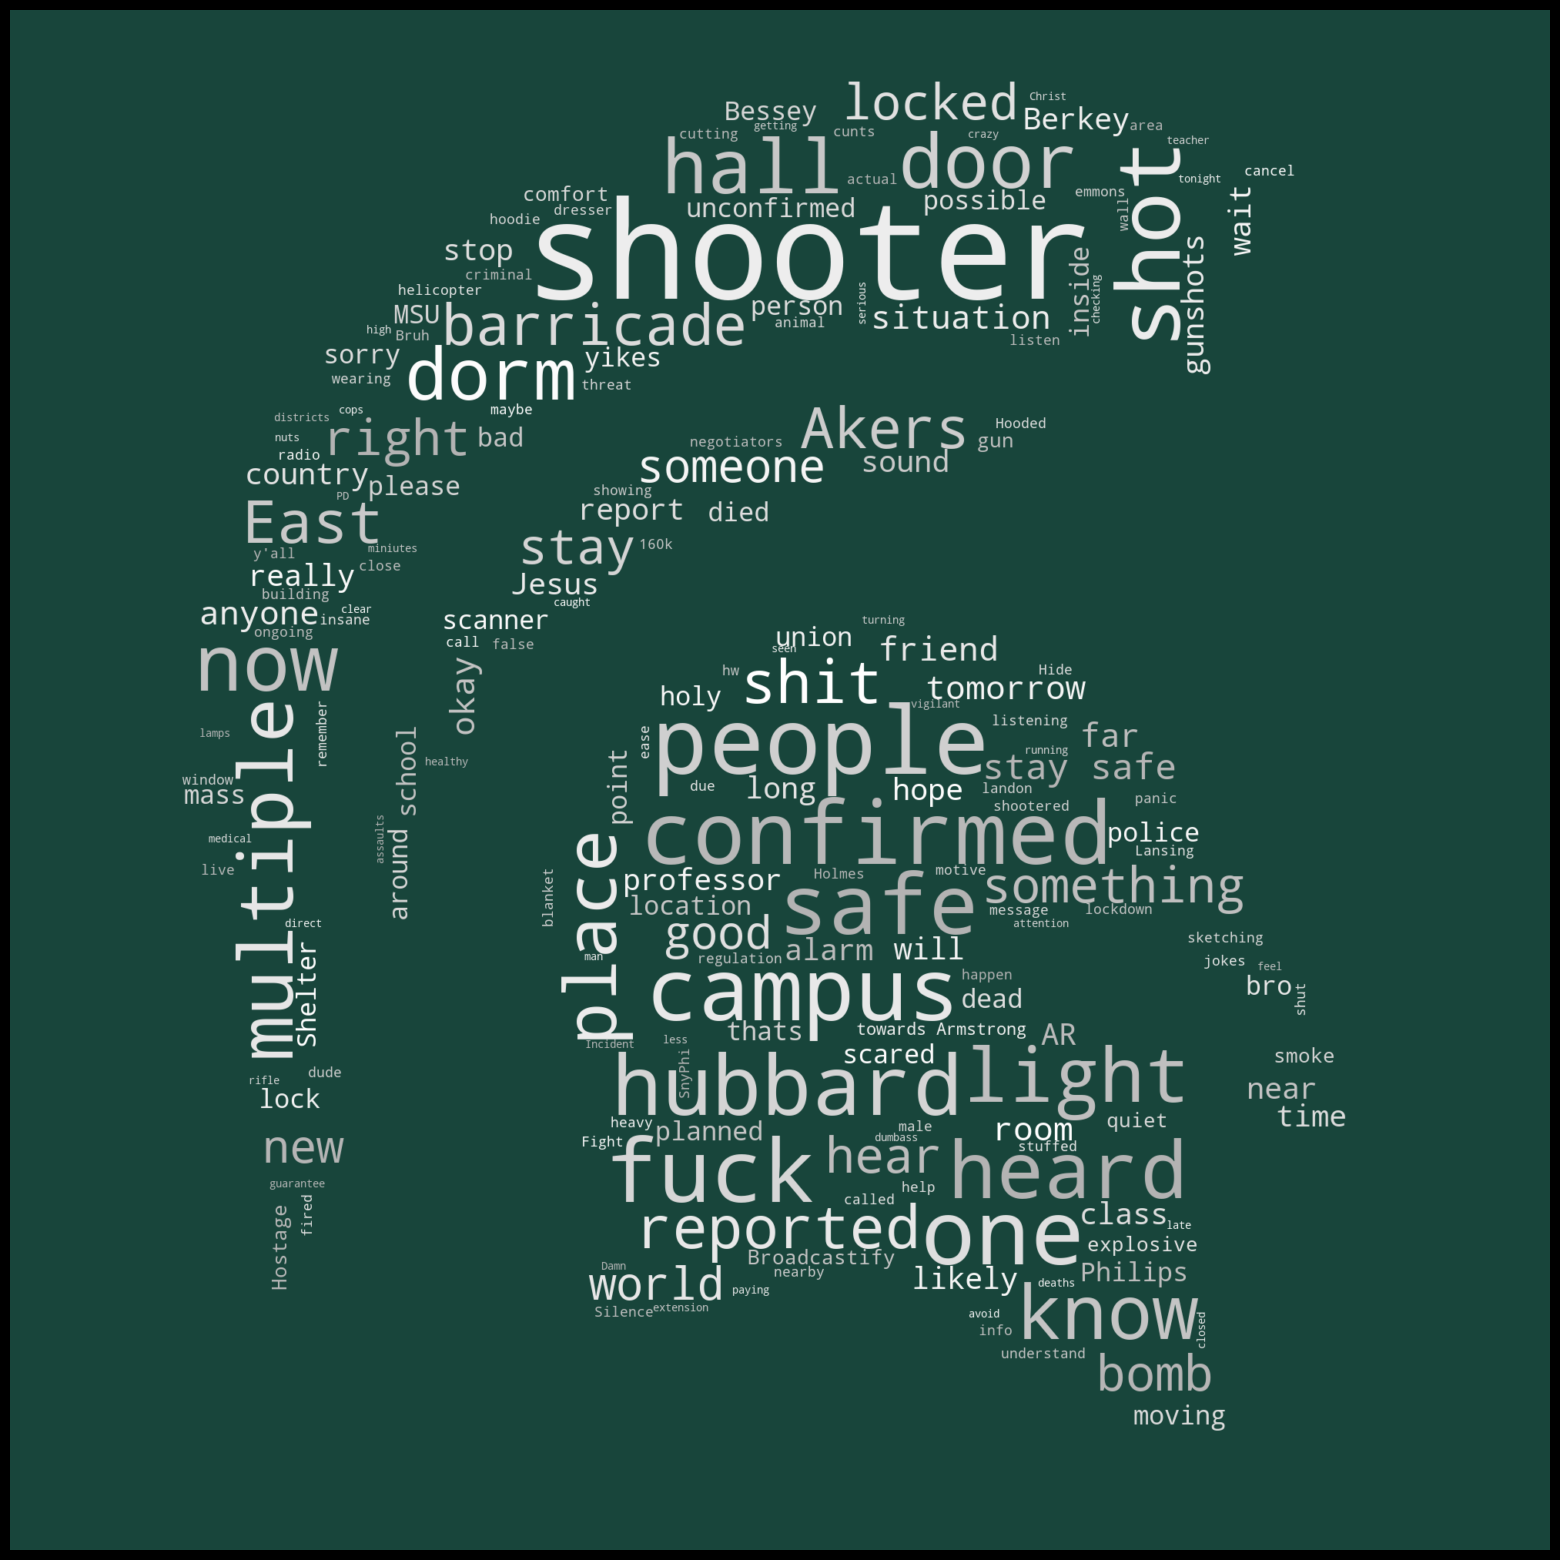

In [175]:
stop_words = [
              'im','f','lmao','well','u','way',
              'ton','dont','pretty','want','ck','two','thing',
              "it'll",'ye','least','use','lot','blue',
              'go','anything','never','completely','lots',
              'said','going','guys','yes','sure',
              'possibly','tell','seems','cse','still','think',
              'tag','sometimes','putting','rn','need','say','saying','nothing',
              'make','turn','often','early','last','actually','yeah','remain',
              'even','everything','first','oh','stuff','consider',
              'gonna','ok','air','groupme','discord','spot','whatnot',
              'check','meant','everyonePossible', 'fly','another','everywhere',
              'hour','almost','must','noon','street','date','requesting','mean',
              'through','asking','seeing','known','best','though',
              'according','number','ask','beyond','Tons','leave','audio',
              'wondering','everyone','thus','coming','cuz'
              ] + list(STOPWORDS)


wc = WordCloud(
                      stopwords = stop_words,
                      width = 800, 
                      height = 800, 
                      random_state=1,  
                      mask = mask,
                      background_color='#18453B',
                      #font_path = 'ariel', 
                      min_font_size=11
                      ).generate(text)


plt.figure(figsize=(20,20), facecolor='k')
plt.tight_layout(pad=0)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3).to_array(), interpolation='bilinear')
plt.axis('off')
plt.show()